# cell_communication
This notebook demonstrate:
1. Niches (Brickman Raredon, et al, 2022) 
For spatial transcriptome data, limiting the nearest neighbor per cell to k, we construct two matrices, cell-cell matrix and neighbors-cell matrix. The element of cell-cell matrix is determined by multiplying the ligand expression of the sending cell and the receptor expression of the receiving cell, also we provide the weighted knn, multiply that by the inverse of the distance. However, neighbors-cell matrix, defined as the signaling input to a cell, determined by taking the geometric mean of the ligand profiles of the surrounding cells and the receptor profile of the receiving cell. 
2. NicheNet (Browaeys, et al, 2020)
We use the prior model in NicheNet, ligand target matrix and ligand receptor network are used to analysis cell interactions.

In [2]:
import sys
sys.path.append('/zfs-1/zuolulu/spateo-release')
import spateo as st

# Load data

The cell_communication/ folder in the spateo-notebooks/cell_communication directory contains the input files used throughout this tutorial. 
* human: ligand_target_matrix.csv  and lr_network.csv
* mouse: ligand_target_matrix_mouse.csv and lr_network_mouse.csv

We use the prior model of human 'ligand_target_matrix.csv' and 'lr_network.csv' from NicheNet (Browaeys, et al, 2020). Also, we apply this analysis to mouse with one-to-one orthologs  which were gathered from NCBI HomoloGene and also from ENSEMBL via biomaRt. 

## test 1 mouse brain

In [4]:
import anndata
ipath = "/zfs-1/zuolulu/spatialDEG/test/01.single_slice_mouse_brain_adult/mouse_brain_adata_cell_labels_sccCluster.h5ad"
adata = anndata.read_h5ad(ipath)
adata

AnnData object with n_obs × n_vars = 54515 × 25077
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'scc_e30_s6'
    var: 'use_for_pca'
    uns: 'PCs', '__type', 'explained_variance_ratio_', 'neighbors', 'pca_mean', 'pp', 'scc_e30_s6', 'scc_e30_s6_colors', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'spatial'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

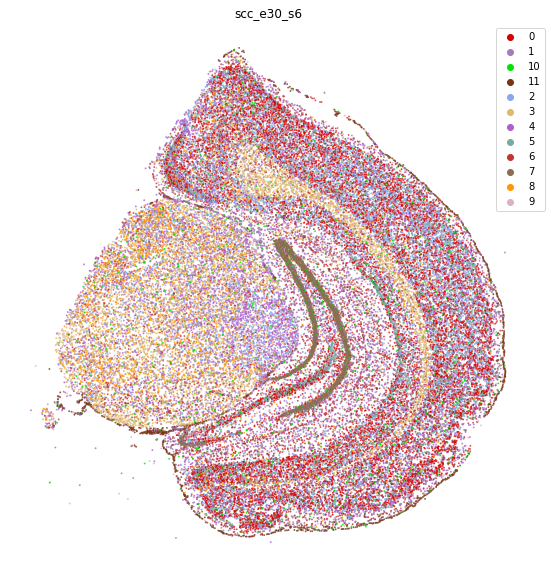

In [6]:
st.pl.space(adata,
                color = 'scc_e30_s6',
                pointsize=0.2,
                ncols=3,
                show_legend="upper left",
                figsize=(10,10)
                )

# plot umap

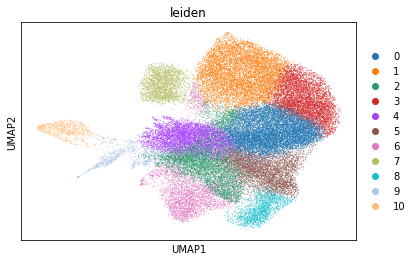

In [6]:
import scanpy as sc
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata,resolution=0.8)
sc.pl.umap(adata, color='leiden')

### 1. Niches

In [5]:
path = '/zfs-1/zuolulu/spatialDEG/test/NicheNet_matrix/'
adata_c2c = st.tl.niches(adata=adata,path=path,weighted=False,species='mouse',system='niches_c2c')
adata_c2c

AnnData object with n_obs × n_vars = 327090 × 10221

In [6]:
adata_c2c_weight = st.tl.niches(adata=adata,path=path,weighted=True,species='mouse',system='niches_c2c')
adata_c2c_weight

AnnData object with n_obs × n_vars = 327090 × 10221

In [7]:
adata_n2c = st.tl.niches(adata=adata,path=path,weighted=False,species='mouse',system='niches_n2c')
adata_n2c

AnnData object with n_obs × n_vars = 54515 × 10221
    obs: 'cell_pair_name'

In [8]:
adata_n2c_weighted = st.tl.niches(adata=adata,path=path,weighted=True,species='mouse',system='niches_n2c')
adata_n2c_weighted

AnnData object with n_obs × n_vars = 54515 × 10221
    obs: 'cell_pair_name'

 visualize Niches umap

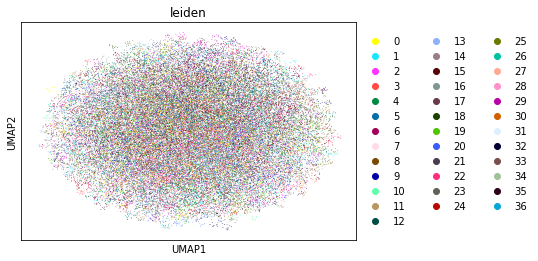

In [9]:
import scanpy as sc
sc.pp.highly_variable_genes(adata_n2c_weighted, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata_n2c_weighted, max_value=10)
sc.tl.pca(adata_n2c_weighted, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(adata_n2c_weighted, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_n2c_weighted)
sc.tl.leiden(adata_n2c_weighted,resolution=0.5)
sc.pl.umap(adata_n2c_weighted, color='leiden')

In [ ]:
sc.pp.neighbors(adata_n2c)
sc.tl.umap(adata_n2c)
sc.tl.leiden(adata_n2c,resolution=0.5)
sc.pl.umap(adata_n2c, color='leiden')

subcluster

In [66]:
adata_sub = adata[adata.obs['scc_e30_s6'].isin(['0','1','10','2','5']),:]
adata_sub

View of AnnData object with n_obs × n_vars = 30428 × 25077
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'scc_e30_s6'
    var: 'use_for_pca'
    uns: 'PCs', '__type', 'explained_variance_ratio_', 'neighbors', 'pca_mean', 'pp', 'scc_e30_s6', 'scc_e30_s6_colors', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'spatial'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [67]:
adata_sub = adata[adata.obs['scc_e30_s6'].isin(['7']),:]
adata_sub

View of AnnData object with n_obs × n_vars = 2749 × 25077
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'scc_e30_s6'
    var: 'use_for_pca'
    uns: 'PCs', '__type', 'explained_variance_ratio_', 'neighbors', 'pca_mean', 'pp', 'scc_e30_s6', 'scc_e30_s6_colors', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'spatial'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [70]:
path = '/zfs-1/zuolulu/spatialDEG/test/NicheNet_matrix/'
adata_c2c_sub = st.tl.niches(adata=adata,path=path,weighted=False,species='mouse',system='niches_c2c')
adata_c2c_sub

AnnData object with n_obs × n_vars = 327090 × 10221

In [71]:
adata_n2c_sub = st.tl.niches(adata=adata,path=path,weighted=False,species='mouse',system='niches_n2c')
adata_n2c_sub

AnnData object with n_obs × n_vars = 54515 × 10221
    obs: 'cell_pair_name'

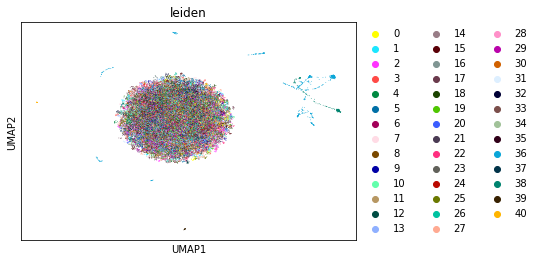

In [73]:
sc.pp.highly_variable_genes(adata_n2c_sub, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata_n2c_sub, max_value=10)
sc.tl.pca(adata_n2c_sub, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(adata_n2c_sub, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_n2c_sub)
sc.tl.leiden(adata_n2c_sub,resolution=0.5)
sc.pl.umap(adata_n2c_sub, color='leiden')

In [85]:
adata

AnnData object with n_obs × n_vars = 54515 × 25077
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'scc_e30_s6'
    var: 'use_for_pca'
    uns: 'PCs', '__type', 'explained_variance_ratio_', 'neighbors', 'pca_mean', 'pp', 'scc_e30_s6', 'scc_e30_s6_colors', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'spatial'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

         Falling back to preprocessing with `sc.pp.pca` and default params.


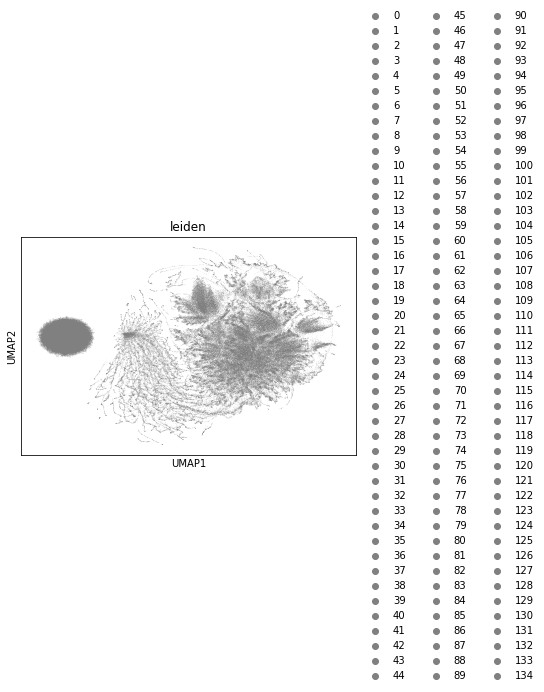

In [74]:
sc.pp.neighbors(adata_c2c_sub)
sc.tl.umap(adata_c2c_sub)
sc.tl.leiden(adata_c2c_sub,resolution=0.5)
sc.pl.umap(adata_c2c_sub, color='leiden')

In [61]:
adata.write_h5ad('/zfs-1/zuolulu/spatialDEG/test/01.single_slice_mouse_brain_adult/mouse_brain_adata_cell_labels_sccCluster_deg.h5ad')

### 2. NicheNet

In [5]:
from cell_communication import predict_ligand_activities,predict_target_genes
path = '/zfs-1/zuolulu/spatialDEG/test/NicheNet_matrix/'
sender_cells = adata.obs['scc_e30_s6'] == '5'
receiver_cells = adata.obs['scc_e30_s6'] == '7'
predict_ligand = predict_ligand_activities(adata=adata,path=path,sender_cells=sender_cells,receiver_cells=receiver_cells,geneset=None,species='mouse')
predict_ligand

/home/zuolulu/anaconda3/envs/spateo/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,ligand,pearson_coef,pearson_pvalue
0,Ncam1,0.144210,0.001908
1,Negr1,0.106529,0.022162
2,Fgf12,0.127577,0.006089
3,Fgf14,0.139979,0.002594
4,Nlgn1,0.076692,0.100053
5,Nlgn3,0.097875,0.035657
6,Nrxn1,0.165728,0.000352
7,Arf1,0.134004,0.003947
8,Calr,0.075682,0.104616
9,App,0.032580,0.485303


In [6]:
from cell_communication import predict_ligand_activities,predict_target_genes
path = '/zfs-1/zuolulu/spatialDEG/test/NicheNet_matrix/'
sender_cells = adata.obs['scc_e30_s6'] == '5'
receiver_cells = adata.obs['scc_e30_s6'] == '7'
predict_target = predict_target_genes(adata=adata,path=path,sender_cells=sender_cells,receiver_cells=receiver_cells,geneset=None,species='mouse')
predict_target

/home/zuolulu/anaconda3/envs/spateo/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,ligand,targets,weights
0,Calm1,Ptma,0.001300
1,Calm1,Actb,0.001204
2,Calm1,Hsp90ab1,0.001313
3,Calm1,Tlcd1,0.001086
4,Calm1,Gapdh,0.001026
...,...,...,...
2,Calr,Gabrb3,0.004668
3,Calr,Ppm1e,0.004752
0,App,Sphkap,0.007231
1,App,Cops9,0.036743


<AxesSubplot:>

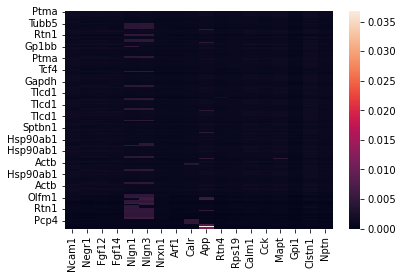

In [8]:
import seaborn as sns
ligand_target_matrix = pd.read_csv(path + 'ligand_target_matrix_mouse.csv', index_col=0)
data = ligand_target_matrix.loc[predict_target['targets'],predict_ligand['ligand']]
sns.heatmap(data=data)

## test 2 human cortex (Jian Hu, et al, 2021)

In [11]:
import sys
sys.path.append('/zfs-1/zuolulu/spateo-release')
sys.path.append('/zfs-1/zuolulu/dynamo-release')
import spateo as st
import dynamo as dyn

In [2]:
import anndata
ipath = '/zfs-1/zuolulu/spatialDEG/test/human_cortex/results.h5ad'
adata = anndata.read_h5ad(ipath)

         Falling back to preprocessing with `sc.pp.pca` and default params.


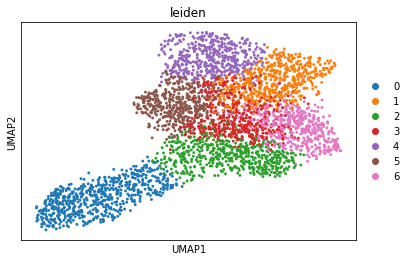

In [3]:
import scanpy as sc
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#sc.pp.scale(adata, max_value=10)
#sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)
sc.tl.leiden(adata,resolution=0.8)
sc.pl.umap(adata, color='leiden')

In [4]:
adata = dyn.tl.neighbors(adata, n_neighbors=30, basis='pca', result_prefix="spatial")

|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.


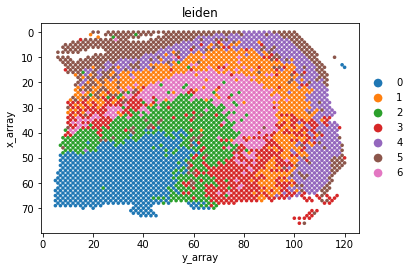

In [5]:
import matplotlib as plt
domains="leiden"
num_celltype=len(adata.obs[domains].unique())
ax=sc.pl.scatter(adata,alpha=1,x="y_array",y="x_array",color=domains,title=domains,show=False,size=190000/adata.shape[0])
ax.set_aspect('equal', 'box')
ax.axes.invert_yaxis()

In [6]:
adata_sub = adata[adata.obs['group'].isin([1,4]),:]
adata_sub

View of AnnData object with n_obs × n_vars = 960 × 19130
    obs: 'x1', 'x2', 'x3', 'x4', 'x5', 'n_counts', 'pred', 'refined_pred', 'x_array', 'y_array', 'x_pixel', 'y_pixel', 'group', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'genename'
    uns: 'pred_colors', 'refined_pred_colors', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'spatial_neighbors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities', 'spatial_distances', 'spatial_connectivities'

In [7]:
path = '/zfs-1/zuolulu/spatialDEG/test/NicheNet_matrix/'
adata_c2c = st.tl.niches(adata=adata,path=path,weighted=False,species='human',system='niches_c2c')
adata_c2c

AnnData object with n_obs × n_vars = 109170 × 6816

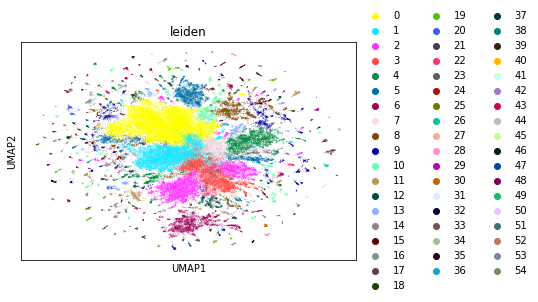

In [8]:
import scanpy as sc
sc.pp.highly_variable_genes(adata_c2c, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata_c2c, max_value=10)
sc.tl.pca(adata_c2c, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(adata_c2c, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata_c2c)
sc.tl.leiden(adata_c2c,resolution=0.2)
sc.pl.umap(adata_c2c, color='leiden')

In [9]:
path = '/zfs-1/zuolulu/spatialDEG/test/NicheNet_matrix/'
adata_n2c = st.tl.niches(adata=adata,path=path,weighted=False,species='human',system='niches_n2c')
adata_n2c

AnnData object with n_obs × n_vars = 3639 × 6816
    obs: 'cell_pair_name'

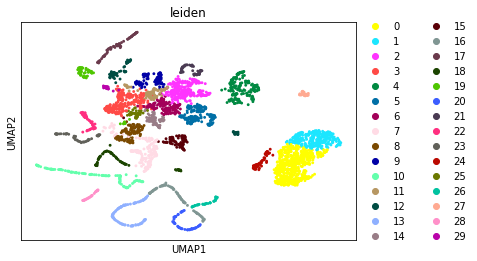

In [10]:
import scanpy as sc
sc.pp.highly_variable_genes(adata_n2c, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata_n2c, max_value=10)
sc.tl.pca(adata_n2c, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(adata_n2c, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata_n2c)
sc.tl.leiden(adata_n2c,resolution=0.5)
sc.pl.umap(adata_n2c, color='leiden')